In [16]:
# !pip install bs4 lxml pandas numpy requests
# !pip install yfinance
# !pip install yahoofinancials
# !pip install transformers -U

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import yfinance as yf
from yahoofinancials import YahooFinancials

# from transformers import pipeline
import warnings
warnings.filterwarnings("ignore")

In [3]:
columns = ['datetime','ticker','source', 'title' ]
df = pd.DataFrame(columns=columns)


#https://markets.businessinsider.com/news/nvda-stock?p={page}  ->> Nvidia stock news
#https://markets.businessinsider.com/news/amzn-stock?p={page}  ->> Amazon stock news
#https://markets.businessinsider.com/news/tsla-stock?p={page}   ->> Tesla stock news
# https://markets.businessinsider.com/news/googl-stock?p={page}  ->> Google stock news
#https://markets.businessinsider.com/news/adbe-stock?p={page} ->> Adobe stock news
#https://markets.businessinsider.com/news/axp-stock?p={page}  ->> American Express stock news
#https://markets.businessinsider.com/news/meta-stock?p={page}     ->> Meta stock news
#https://markets.businessinsider.com/news/spot-stock?p={page}     ->> Spotify stock news
#https://markets.businessinsider.com/news/msft-stock?p={page}     ->> Microsoft stock news
#https://markets.businessinsider.com/news/jpm-stock?p={page}  -->JPMorgan stock news


counter = 0
for page in range(1,200):
   url = f'https://markets.businessinsider.com/news/googl-stock?p={page}'
   response = requests.get(url)
   html = response.text
   soup = BeautifulSoup (html, 'lxml')
   articles = soup.find_all('div', class_ = 'latest-news__story')
   for article in articles:
       datetime = article.find('time', class_ = 'latest-news__date').get('datetime')
       title = article.find('a', class_ = 'news-link').text
       source = article.find('span', class_ = 'latest-news__source').text
    #  link = article.find('a', class_ = 'news-link').get('href')
       ticker = 'GOOGL' # 'AMZN', 'TSLA', 'GOOGL', 'ADBE', 'AXP', 'META', 'NVDA' ,'SPOT' ,'MSFT' ,'JPM'
       df = pd.concat([pd.DataFrame([[datetime,ticker, source,title]], columns=df.columns), df], ignore_index=True)
       counter += 1


print (f'{counter} headlines scraped from {page+1} pages')

2450 headlines scraped from 50 pages


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
print(df.shape)
df.head()

(2450, 4)


,datetime,ticker,source,title
0,2023-03-18 23:01:35,GOOGL,InvestorPlace,7 Best Stocks to Buy for a Sideways Market
1,2023-03-19 14:32:06,GOOGL,Seeking Alpha,Television usage dips in February - but stream...
2,2023-03-19 23:25:09,GOOGL,Benzinga,"If You Invested $1,000 In Meta Platforms When ..."
3,2023-03-20 06:50:59,GOOGL,Benzinga,"Big Techs Race To Capitalize On AI, Says Munst..."
4,2023-03-20 14:15:34,GOOGL,InvestorPlace,7 AI Stocks to Buy for Long-Term Growth


In [7]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df.drop(columns=['datetime'], inplace=True)

In [8]:
df.head()

,ticker,source,title,date,time
0,GOOGL,InvestorPlace,7 Best Stocks to Buy for a Sideways Market,2023-03-18,23:01:35
1,GOOGL,Seeking Alpha,Television usage dips in February - but stream...,2023-03-19,14:32:06
2,GOOGL,Benzinga,"If You Invested $1,000 In Meta Platforms When ...",2023-03-19,23:25:09
3,GOOGL,Benzinga,"Big Techs Race To Capitalize On AI, Says Munst...",2023-03-20,06:50:59
4,GOOGL,InvestorPlace,7 AI Stocks to Buy for Long-Term Growth,2023-03-20,14:15:34


In [9]:
cols = df.columns.tolist()  #['source', 'title', 'top_sentiment', 'sentiment_score', 'date', 'time']
cols = cols[-2:] + cols[:-2]
print(cols)

['date', 'time', 'ticker', 'source', 'title']


In [13]:
df = df[cols]
df.tail(5)

,date,time,ticker,source,title
2445,2024-06-17,10:05:00,GOOGL,InvestorPlace,Forget Big AI: Apple’s Small AI Approach Could...
2446,2024-06-17,10:30:00,GOOGL,InvestorPlace,Alphabet Stock Buy Alert: Position Yourself fo...
2447,2024-06-17,11:30:00,GOOGL,InvestorPlace,Nvidia’s Midas Touch: 3 Data Storage Stocks Ba...
2448,2024-06-17,14:04:03,GOOGL,Benzinga,Broadcom's Cutting-Edge AI Networking Technolo...
2449,2024-06-17,14:06:37,GOOGL,Benzinga,This Analyst With 86% Accuracy Rate Sees Over ...


In [12]:
# df.to_csv('historical_nvidia_1.csv', index=False)
# df.to_csv('historical_tsla_1.csv', index=False)
# df.to_csv('historical_amazon_1.csv', index=False)
# df.to_csv('historical_Google_1.csv', index=False)
# df.to_csv('historical_adobe_1.csv', index=False)
# df.to_csv('historical_axp_1.csv', index=False)
# df.to_csv('historical_meta_1.csv', index=False)
# df.to_csv('historical_spotify_1.csv', index=False)
# df.to_csv('historical_microsoft_1.csv', index=False)
# df.to_csv('historical_jpmorgan_1.csv', index=False)
df.to_csv('backtraders_google.csv', index=False)

# Combining all stocks in one  csv file

#

In [181]:
all_csv_files = ['historical_nvidia_1.csv', 'historical_amazon_1.csv', 'historical_tsla_1.csv','historical_axp_1.csv','historical_Google_1.csv','historical_adobe_1.csv','historical_meta_1.csv','historical_spotify_1.csv','historical_microsoft_1.csv','historical_jpmorgan_1.csv']

combined_stock_news = pd.concat([pd.read_csv(file) for file in all_csv_files ], ignore_index=True)
 
combined_stock_news

,date,time,ticker,source,title
0,2014-01-06,06:49:36,NVDA,Reuters,Nvidia CEO talks up mobile chips with brawny P...
1,2014-04-23,23:26:52,NVDA,Reuters,Ex-Nvidia manager settles U.S. SEC charges on ...
2,2015-06-01,05:31:48,NVDA,Reuters,Nvidia says it sees revenue from cloud computi...
3,2016-01-05,06:03:35,NVDA,Reuters,Nvidia says Volvo is first customer for new au...
4,2016-09-28,15:10:26,NVDA,Reuters,BRIEF-Nvidia and TomTom develop mapping system...
...,...,...,...,...,...
69780,2024-06-06,17:21:59,JPM,TipRanks,ICBC: China’s Banking Leader on the Global Stage
69781,2024-06-07,11:35:00,JPM,InvestorPlace,"Look Out, Bears! Why Short Selling May Soon Di..."
69782,2024-06-10,18:54:36,JPM,InvestorPlace,Trillion-Dollar Trio: The Next 3 Stocks to Joi...
69783,2024-06-10,19:16:50,JPM,Seeking Alpha,JPMorgan Chase hires former PayPal executive a...


In [182]:
combined_stock_news.to_csv('combined_stock_news_1.csv')

In [2]:
# combined_stock_news = pd.read_csv('combined_stock_news_1.csv')
combined_stock_news = pd.read_csv('backtraders_google.csv')
combined_stock_news.drop(columns=['time', 'source'],index=0, inplace=True)

In [3]:
combined_stock_news.head(5)

,date,ticker,title
1,2023-03-19,GOOGL,Television usage dips in February - but stream...
2,2023-03-19,GOOGL,"If You Invested $1,000 In Meta Platforms When ..."
3,2023-03-20,GOOGL,"Big Techs Race To Capitalize On AI, Says Munst..."
4,2023-03-20,GOOGL,7 AI Stocks to Buy for Long-Term Growth
5,2023-03-21,GOOGL,"S&P 500 Hits 4,000, Bank Stocks Soar, Treasury..."


In [4]:
combined_stock_news =  combined_stock_news.groupby(['date','ticker'])['title'].apply(' '.join).reset_index()

In [5]:
print(combined_stock_news.shape)
combined_stock_news

(415, 3)


,date,ticker,title
0,2023-03-19,GOOGL,Television usage dips in February - but stream...
1,2023-03-20,GOOGL,"Big Techs Race To Capitalize On AI, Says Munst..."
2,2023-03-21,GOOGL,"S&P 500 Hits 4,000, Bank Stocks Soar, Treasury..."
3,2023-03-22,GOOGL,Analysts Are Bullish on Top Technology Stocks:...
4,2023-03-23,GOOGL,"5 Best Technology Stocks to Invest in Now, Acc..."
...,...,...,...
410,2024-06-12,GOOGL,Alphabet Class A (GOOGL) Receives a Buy from E...
411,2024-06-13,GOOGL,Screaming Buys- 3 Tech Stocks That Are Just Be...
412,2024-06-14,GOOGL,3 Stocks to Catapult Your $100K Into a Cool Mi...
413,2024-06-15,GOOGL,Why Intel Stock Is Undervalued and Well-Positi...


In [12]:
def fetch_stock_prices(ticker, date):
    stock = yf.Ticker(ticker)
    start_date = pd.to_datetime(date)
    end_date = start_date + pd.Timedelta(days=1)
    
    hist = stock.history(start=start_date, end=end_date)
    # print(hist)
    if not hist.empty:
        open_price = hist['Open'][0]
        high_price = hist['High'][0]
        low_price = hist['Low'][0]
        close_price = hist['Close'][0]
        adjusted_close = hist['Adj Close'][0]
        vol = hist['Volume'][0]
        return open_price, high_price, low_price, close_price ,adjusted_close, vol
    else:
        return None, None, None, None , None, None
    

In [ ]:

price_data = combined_stock_news.apply(lambda row: fetch_stock_prices(row['ticker'], row['date']), axis=1)
combined_stock_news[['open', 'high', 'low', 'close','Adj Close', 'vol']] = pd.DataFrame(price_data.tolist(), index=combined_stock_news.index)

In [21]:
combined_stock_news.isnull().value_counts()

date   ticker  title  open   high   low    close  vol  
False  False   False  False  False  False  False  False    313
                      True   True   True   True   True     102
Name: count, dtype: int64

In [22]:
combined_stock_news = combined_stock_news.dropna(subset=['open', 'high', 'low', 'close','vol']).reset_index()

In [ ]:
combined_stock_news

In [26]:
stock_news = pd.read_csv('Scrabed_Dataset_for_Differnt_Stocks\combined_with_price.csv',usecols=['date', 'ticker', 'title', 'open', 'high', 'low', 'close'])

# Sort by ticker and date to ensure proper time series order
stock_news= stock_news.sort_values(by=['ticker', 'date'])
# stock_news

**Calculate the price movement**:
   - We need to define a time horizon (e.g., 1 day, 3 days, 1 week).
   - Calculate the percentage change in the closing price over this horizon.

```python

In [6]:
# Define the time horizon (e.g., 1 day)
time_horizon = 1  

stock_news['future_close'] = stock_news.groupby('ticker')['close'].shift(-time_horizon)

stock_news['price_movement'] = ((stock_news['future_close'] - stock_news['close']) / stock_news['close']) * 100

stock_news =stock_news.dropna(subset=['future_close'])

In [7]:
increase_threshold = -1  # Example: 1% increase
decrease_threshold = -1  # Example: 1% decrease

# Function to label the price movement
# 1->increase, 0->no change, -1->decrease
def label_movement(movement):
    if movement >= increase_threshold:
        return 1
    elif movement < decrease_threshold:
        return 0
    # else:
    #     return -1

# Apply the labeling function
stock_news['movement_label'] = stock_news['price_movement'].apply(label_movement)
stock_news.head()

,date,ticker,title,open,high,low,close,future_close,price_movement,movement_label
51,2012-12-20,ADBE,Adobe acquires social media firm Behance as it...,38.080002,38.160000,37.790001,37.869999,43.360001,14.496968,1
112,2013-06-18,ADBE,Adobe Systems profit beats as Creative Cloud s...,43.549999,44.200001,43.220001,43.360001,45.779999,5.581177,1
114,2013-06-19,ADBE,Adobe expects third-quarter Creative Cloud sub...,46.430000,46.439999,45.349998,45.779999,54.860001,19.833993,1
175,2013-10-29,ADBE,Adobe data breach more extensive than previous...,54.000000,55.119999,53.910000,54.860001,68.519997,24.899737,1
226,2014-03-18,ADBE,Adobe results beat estimates as web-based subs...,67.660004,70.239998,67.519997,68.519997,70.730003,3.225346,1


#### **To preprocess the textual data, we will**:
   - Remove noise: Remove unwanted characters, numbers, and symbols.
   - Tokenize text: Split text into words or phrases.
   - Apply stemming and lemmatization: Standardize text representations to their root forms.

```python

In [8]:
# !pip install nltk spacy
# !python -m spacy download en_core_web_sm

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm
# import spacy
# import gensim
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load Spacy English model
# nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# text preprocessing function

def preprocess_text(text):
        # Convert text to lowercase
        text = text.lower()
        
        # Remove special characters, numbers, and symbols
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        
        # Tokenize the text
        tokens = word_tokenize(text)
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]
        
        # Apply stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
        
        # Apply lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word ,pos ='v') for word in tokens]
        
        return ' '.join(tokens)

stock_news['preprocessed_text'] = stock_news['title'].apply(preprocess_text)

In [34]:
# stock_news

In [12]:
# !pip install scikit-learn
# !pip install -U textblob
# !python -m textblob.download_corpora
# !pip install gensim==3.6.0

# !pip install scipy==1.12

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yashu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
def apply_vader_sentiment(df, text_column):

    analyzer = SentimentIntensityAnalyzer()
    
    def get_vader_sentiment(text):
        scores = analyzer.polarity_scores(text)
        return scores['neg'], scores['neu'], scores['pos'], scores['compound']
    
    vader_sentiments = df[text_column].apply(get_vader_sentiment)
    df['vader_neg'] = vader_sentiments.apply(lambda x: x[0])
    df['vader_neu'] = vader_sentiments.apply(lambda x: x[1])
    df['vader_pos'] = vader_sentiments.apply(lambda x: x[2])
    df['vader_compound'] = vader_sentiments.apply(lambda x: x[3])

    # Classify the sentiment based on compound score
    def classify_sentiment(compound_score):
        if compound_score >= -0.05:
            return 1
        elif compound_score < -0.05:
            return 0
    
    df['vader_prediction'] = df['vader_compound'].apply(classify_sentiment)
    
    return df

stock_pre_processed_news = apply_vader_sentiment(stock_news, 'preprocessed_text')

In [46]:
# stock_pre_processed_news.head(10)

In [47]:
# Print Vader sentiment accuracy
print('vader Accuracy:', round((len(stock_pre_processed_news[stock_pre_processed_news['movement_label']==    stock_pre_processed_news['vader_prediction']])/len(stock_pre_processed_news)) *100, 5), '%', '\n')

vader Accuracy: 65.40835 % 



#### Visualizing the Accuracy of Vedar Model

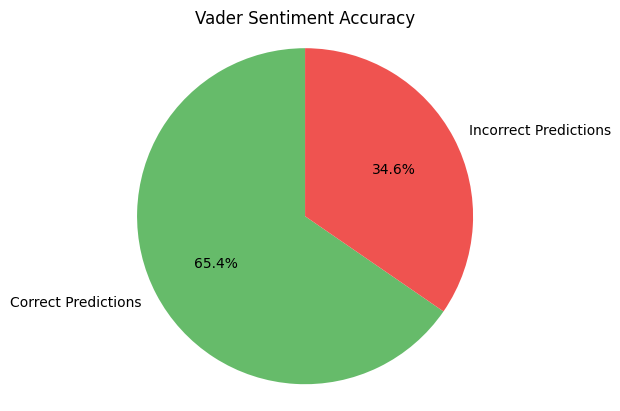

In [48]:
# Plot Vader sentiment accuracy
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [len(stock_pre_processed_news[stock_pre_processed_news['movement_label'] == stock_pre_processed_news['vader_prediction']]), len(stock_pre_processed_news[stock_pre_processed_news['movement_label'] != stock_pre_processed_news['vader_prediction']])]
colors = ['#66BB6A', '#EF5350']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vader Sentiment Accuracy')
plt.show()

#### Model Fitting and Training

In [49]:
# !pip install xgboost

In [50]:
from sklearn.naive_bayes import MultinomialNB #Model
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score #for model accuracy

In [51]:
X_train,X_test,y_train,y_test = train_test_split(stock_pre_processed_news['preprocessed_text'],stock_pre_processed_news['movement_label'],test_size=0.2,random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape )

(8816,) (8816,)
(2204,) (2204,)


ImportError: cannot import name 'Mapping' from 'collections' (c:\Users\yashu\AppData\Local\Programs\Python\Python312\Lib\collections\__init__.py)

In [34]:
#Initilize Vectorizer

tf_idf = TfidfVectorizer(ngram_range = (1,4),max_features= 10000,binary=True,
                         smooth_idf=False)


# Get TF-IDF for Train and Test data
X_total = tf_idf.fit_transform(stock_pre_processed_news['preprocessed_text'])
y =stock_pre_processed_news['movement_label']
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)

In [35]:
# Function to evaluate and plot ROC curves
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
    return accuracy, precision, recall, f1, roc_auc

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.04      0.07       567
           1       0.75      0.99      0.85      1637

    accuracy                           0.75      2204
   macro avg       0.67      0.51      0.46      2204
weighted avg       0.71      0.75      0.65      2204

Logistic Regression - Accuracy: 0.75, Precision: 0.75, Recall: 0.99, F1-Score: 0.85, AUC: 0.61

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.02      0.03       567
           1       0.75      1.00      0.85      1637

    accuracy                           0.74      2204
   macro avg       0.69      0.51      0.44      2204
weighted avg       0.71      0.74      0.64      2204

SVM - Accuracy: 0.74, Precision: 0.75, Recall: 1.00, F1-Score: 0.85, AUC: 0.62

Random Forest Classification Report:
              precision    recall  f1-score   support

        

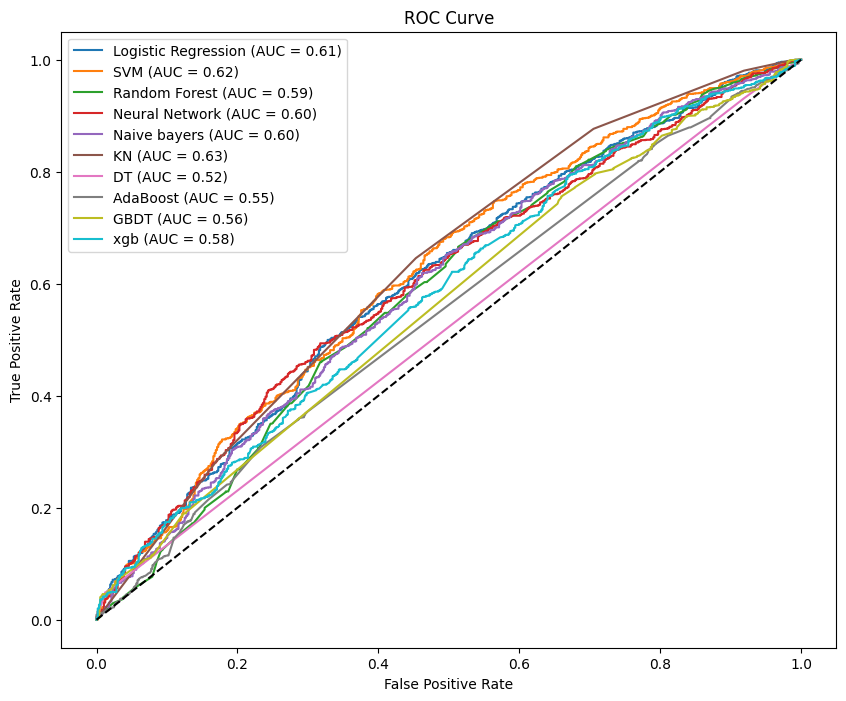

In [36]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42),
    "Naive bayers" : MultinomialNB(alpha=1),
    'KN' : KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2),
    'GBDT':GradientBoostingClassifier(n_estimators=50,random_state=2),
    'xgb':XGBClassifier(n_estimators=50,random_state=2)
}

# Evaluate each model and plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test, model_name)
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, AUC: {roc_auc:.2f}\n")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()